
Group A: Anais, Andreea y Mar

Countries assigned:
    Argentina, Russia, Colombia, Chile and Spain


Option C

1. Document all steps. Structure your code to keep it cleaned using good practices.

DONE: 2. Collect Coronavirus Data. It is mandatory that in each call, it collects the last updated data.

MAR: 3. Determine and explain if the data is cleaned. If not, then clean it.

4. Create an API that returns a Json with the logic explained for your group. The flask server must be executed running the src/api/server.py file.
5. Get the jsons generated from your annexed group and plot it. First, try to connect to the private ip of your     annexed group. If it is not possible because of physical issues, then simply use what they generate copying it. If your annexed group cannot give you the necessary json, then annotate it, use the json of another group.

ANAIS: 6. Show different tendencies for each column in your dataset. Show, vertically, the start date and end date of the alarm state in each plot. If there is no alarm state, then show only the start date.

ANDREEA: 7. Draw the workflow of your program. You can use free tools.

8. Per country, which are the columns that are more related find the correlation between columns with the           correlation matrix.

DONE: 9. Use a different github repository adding all group participants with write permissions. Use that repository to manage the delivery code and resources. It is mandatory that every student of the group does, at least,five commits/push.

    10. Answer the questions:
        a. What position do your countries occupe respect to the number of total infected, total deaths and                 total recoveries?
        b. What can you conclude about your data study?
        c. Are there outliers or some rare data?



Our API must offer data to Group B and receive it from Group F, as follows:

    We have to offer a json(df):
    - Group A: it must return a json with one key “n_c_averages” that represents
    the mean of the “new_cases” per day of all of your countries.


    We should receive a json(df):
    - Group F: it must return a json with one key “n_t_averages” that represents the
    mean of the “new_tests” per day of all your countries.
    
Option B.... to be continued

In [1]:
#importamos librerias y funciones
import pandas as pd
import seaborn as sns
from utils.folders_tb import jsonlink_df
from utils.mining_data_tb import filter_df, df_covid, datetime, data_complete_clean, data_paises_clean, group, sort_columns
from utils.visualization_tb import heatmap_df, detect_outliers_df, plot_clean_columns,remove_outlier,boxplots_per_country,heatmap_with_column_filters, position_countries

In [2]:
#Dataset total limpio 
covid_complete= data_complete_clean()
covid_complete

location  population  life_expectancy  data.date  data.total_cases  \
0      Afghanistan  38928341.0            64.83 2020-02-24               1.0   
1      Afghanistan  38928341.0            64.83 2020-02-25               1.0   
2      Afghanistan  38928341.0            64.83 2020-02-26               1.0   
3      Afghanistan  38928341.0            64.83 2020-02-27               1.0   
4      Afghanistan  38928341.0            64.83 2020-02-28               1.0   
...            ...         ...              ...        ...               ...   
61111     Zimbabwe  14862927.0            61.49 2021-01-17           27203.0   
61112     Zimbabwe  14862927.0            61.49 2021-01-18           27892.0   
61113     Zimbabwe  14862927.0            61.49 2021-01-19           28675.0   
61114     Zimbabwe  14862927.0            61.49 2021-01-20           29408.0   
61115     Zimbabwe  14862927.0            61.49 2021-01-21           30047.0   

       data.new_cases  data.total_cases_per_million  \
0                 1.0                         0.026   
1                 0.0                         0.026   
2                 0.0                         0.026   
3                 0.0                         0.026   
4                 0.0                         0.026   
...               ...                           ...   
61111           322.0                      1830.259   
61112           689.0                      1876.616   
61113           783.0                      1929.297   
61114           733.0                      1978.614   
61115           639.0                      2021.607   

       data.new_cases_per_million  data.stringency_index  \
0                           0.026                   8.33   
1                           0.000                   8.33   
2                           0.000                   8.33   
3                           0.000                   8.33   
4                           0.000                   8.33   
...                           ...                    ...   
61111                      21.665                  87.04   
61112                      46.357                    NaN   
61113                      52.681                    NaN   
61114                      49.317                    NaN   
61115                      42.993                    NaN   

       data.new_cases_smoothed  ...  data.reproduction_rate  data.total_tests  \
0                          NaN  ...                     NaN               NaN   
1                          NaN  ...                     NaN               NaN   
2                          NaN  ...                     NaN               NaN   
3                          NaN  ...                     NaN               NaN   
4                          NaN  ...                     NaN               NaN   
...                        ...  ...                     ...               ...   
61111                  818.000  ...                     NaN          272082.0   
61112                  799.286  ...                     NaN          275911.0   
61113                  776.571  ...                     NaN          280636.0   
61114                  736.000  ...                     NaN               NaN   
61115                  668.429  ...                     NaN               NaN   

       data.total_tests_per_thousand  data.tests_units  \
0                                NaN               NaN   
1                                NaN               NaN   
2                                NaN               NaN   
3                                NaN               NaN   
4                                NaN               NaN   
...                              ...               ...   
61111                         18.306   tests performed   
61112                         18.564   tests performed   
61113                         18.882   tests performed   
61114                            NaN               NaN   
61115                            NaN               NaN  

In [3]:
#Dataset limpio filtrado por nuestros paises
covid_paises= data_paises_clean()
covid_paises

location  population  life_expectancy  data.date  data.total_tests  \
0     Argentina  45195777.0            76.67 2020-01-01               4.0   
1     Argentina  45195777.0            76.67 2020-01-02              14.0   
2     Argentina  45195777.0            76.67 2020-01-03              19.0   
3     Argentina  45195777.0            76.67 2020-01-04              31.0   
4     Argentina  45195777.0            76.67 2020-01-05              41.0   
...         ...         ...              ...        ...               ...   
1751      Spain  46754783.0            83.56 2021-01-17               NaN   
1752      Spain  46754783.0            83.56 2021-01-18               NaN   
1753      Spain  46754783.0            83.56 2021-01-19               NaN   
1754      Spain  46754783.0            83.56 2021-01-20               NaN   
1755      Spain  46754783.0            83.56 2021-01-21               NaN   

      data.new_tests  data.total_tests_per_thousand  \
0                4.0                          0.000   
1               10.0                          0.000   
2                5.0                          0.000   
3               12.0                          0.001   
4               10.0                          0.001   
...              ...                            ...   
1751             NaN                            NaN   
1752             NaN                            NaN   
1753             NaN                            NaN   
1754             NaN                            NaN   
1755             NaN                            NaN   

      data.new_tests_per_thousand data.tests_units  data.stringency_index  \
0                             0.0    people tested                    0.0   
1                             0.0    people tested                    0.0   
2                             0.0    people tested                    0.0   
3                             0.0    people tested                    0.0   
4                             0.0    people tested                    0.0   
...                           ...              ...                    ...   
1751                          NaN              NaN                   71.3   
1752                          NaN              NaN                   71.3   
1753                          NaN              NaN                   71.3   
1754                          NaN              NaN                   71.3   
1755                          NaN              NaN                    NaN   

      ...  data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
0     ...                NaN              NaN                       NaN   
1     ...                NaN              NaN                       NaN   
2     ...                NaN              NaN                       NaN   
3     ...                NaN              NaN                       NaN   
4     ...                NaN              NaN                       NaN   
...   ...                ...              ...                       ...   
1751  ...            53314.0              0.0                   205.714   
1752  ...            53769.0            455.0                   213.429   
1753  ...            54173.0            404.0                   212.857   
1754  ...            54637.0            464.0                   251.286   
1755  ...            55041.0            404.0                   280.286   

      data.new_cases_smoothed_per_million  data.total_deaths_per_million  \
0                                     NaN                            NaN   
1                                     NaN                            NaN   
2                                     NaN                            NaN   
3                                     NaN                            NaN   
4                                     NaN                            NaN   
...                                   ...                            ...   
1751                              616.603                      

In [41]:
#Importamos el dataset actualizado
covid = jsonlink_df('https://covid.ourworldindata.org/data/owid-covid-data.json').T
covid

continent     location    population population_density median_age  \
AFG           Asia  Afghanistan    38928341.0             54.422       18.6   
ALB         Europe      Albania     2877800.0            104.871       38.0   
DZA         Africa      Algeria    43851043.0             17.348       29.1   
AND         Europe      Andorra       77265.0            163.755        NaN   
AGO         Africa       Angola    32866268.0             23.890       16.8   
...            ...          ...           ...                ...        ...   
VNM           Asia      Vietnam    97338583.0            308.127       32.6   
OWID_WRL       NaN        World  7794798729.0             58.045       30.9   
YEM           Asia        Yemen    29825968.0             53.508       20.3   
ZMB         Africa       Zambia    18383956.0             22.995       17.7   
ZWE         Africa     Zimbabwe    14862927.0             42.729       19.6   

         aged_65_older aged_70_older gdp_per_capita cardiovasc_death_rate  \
AFG              2.581         1.337       1803.987               597.029   
ALB             13.188         8.643      11803.431               304.195   
DZA              6.211         3.857      13913.839               278.364   
AND                NaN           NaN            NaN               109.135   
AGO              2.405         1.362       5819.495               276.045   
...                ...           ...            ...                   ...   
VNM              7.150         4.718       6171.884               245.465   
OWID_WRL         8.696         5.355      15469.207               233.070   
YEM              2.922         1.583       1479.147               495.003   
ZMB              2.480         1.542       3689.251               234.499   
ZWE              2.822         1.882       1899.775               307.846   

         diabetes_prevalence handwashing_facilities  \
AFG                     9.59                 37.746   
ALB                    10.08                    NaN   
DZA                     6.73                 83.741   
AND                     7.97                    NaN   
AGO                     3.94                 26.664   
...                      ...                    ...   
VNM                     6.00                 85.847   
OWID_WRL                8.51                 60.130   
YEM                     5.35                 49.542   
ZMB                     3.94                 13.938   
ZWE                     1.82                 36.791   

         hospital_beds_per_thousand life_expectancy human_development_index  \
AFG                           0.500           64.83                   0.498   
ALB                           2.890           78.57                   0.785   
DZA                           1.900           76.88                   0.754   
AND                             NaN           83.73                   0.858   
AGO                             NaN           61.15                   0.581   
...                             ...             ...                     ...   
VNM                           2.600           75.40                   0.694   
OWID_WRL                      2.705           72.58                     NaN   
YEM                           0.700           66.12                   0.452   
ZMB                           2.000           63.89                   0.588   
ZWE                           1.700           61.49                   0.535   

                                                       data extreme_poverty  \
AFG       [{'date': '2020-02-24', 'total_cases': 1.0, 'n...             NaN   
ALB       [{'date': '2020-03-09', 'total_cases': 2.0, 'n...             1.1   
DZA       [{'date': '2020-02-25', 'total_cases': 1.0, 'n...             0.5   
AND       [{'date': '2020-03-02', 'total_cases': 1.0, 'n...             NaN   
AGO       [{'date': '2020-03-20', 'total_cases': 1.0, 'n...             NaN   
...                                                

In [42]:
#Filtramos nuestros paises
covid=filter_df(covid,'location','Argentina','Russia', 'Colombia', 'Chile', 'Spain')
covid

continent   location   population population_density median_age  \
ARG  South America  Argentina   45195777.0             16.177       31.9   
CHL  South America      Chile   19116209.0             24.282       35.4   
COL  South America   Colombia   50882884.0             44.223       32.2   
RUS         Europe     Russia  145934460.0              8.823       39.6   
ESP         Europe      Spain   46754783.0             93.105       45.5   

    aged_65_older aged_70_older gdp_per_capita cardiovasc_death_rate  \
ARG        11.198         7.441      18933.907               191.032   
CHL        11.087         6.938      22767.037               127.993   
COL         7.646         4.312      13254.949               124.240   
RUS        14.178         9.393      24765.954               431.297   
ESP        19.436        13.799      34272.360                99.403   

    diabetes_prevalence handwashing_facilities hospital_beds_per_thousand  \
ARG                5.50                    NaN                       5.00   
CHL                8.46                    NaN                       2.11   
COL                7.44                 65.386                       1.71   
RUS                6.18                    NaN                       8.05   
ESP                7.17                    NaN                       2.97   

    life_expectancy human_development_index  \
ARG           76.67                   0.825   
CHL           80.18                   0.843   
COL           77.29                   0.747   
RUS           72.58                   0.816   
ESP           83.56                   0.891   

                                                  data extreme_poverty  \
ARG  [{'date': '2020-01-01', 'total_tests': 4.0, 'n...             0.6   
CHL  [{'date': '2020-02-23', 'total_cases': 2.0, 'n...             1.3   
COL  [{'date': '2020-03-06', 'total_cases': 1.0, 'n...             4.5   
RUS  [{'date': '2020-01-31', 'total_cases': 2.0, 'n...             0.1   
ESP  [{'date': '2020-02-01', 'total_cases': 1.0, 'n...             1.0   

    female_smokers male_smokers  
ARG           16.2         27.7  
CHL           34.2         41.5  
COL            4.7         13.5  
RUS           23.4         58.3  
ESP           27.4         31.4

In [43]:
#Extraemos la columna "data"
covid=df_covid(covid,val1="data")
covid

continent   location  population  population_density  median_age  \
0     South America  Argentina  45195777.0              16.177        31.9   
1     South America  Argentina  45195777.0              16.177        31.9   
2     South America  Argentina  45195777.0              16.177        31.9   
3     South America  Argentina  45195777.0              16.177        31.9   
4     South America  Argentina  45195777.0              16.177        31.9   
...             ...        ...         ...                 ...         ...   
1749         Europe      Spain  46754783.0              93.105        45.5   
1750         Europe      Spain  46754783.0              93.105        45.5   
1751         Europe      Spain  46754783.0              93.105        45.5   
1752         Europe      Spain  46754783.0              93.105        45.5   
1753         Europe      Spain  46754783.0              93.105        45.5   

      aged_65_older  aged_70_older  gdp_per_capita  cardiovasc_death_rate  \
0            11.198          7.441       18933.907                191.032   
1            11.198          7.441       18933.907                191.032   
2            11.198          7.441       18933.907                191.032   
3            11.198          7.441       18933.907                191.032   
4            11.198          7.441       18933.907                191.032   
...             ...            ...             ...                    ...   
1749         19.436         13.799       34272.360                 99.403   
1750         19.436         13.799       34272.360                 99.403   
1751         19.436         13.799       34272.360                 99.403   
1752         19.436         13.799       34272.360                 99.403   
1753         19.436         13.799       34272.360                 99.403   

      diabetes_prevalence  ...  data.new_vaccinations_smoothed_per_million  \
0                    5.50  ...                                         NaN   
1                    5.50  ...                                         NaN   
2                    5.50  ...                                         NaN   
3                    5.50  ...                                         NaN   
4                    5.50  ...                                         NaN   
...                   ...  ...                                         ...   
1749                 7.17  ...                                      1502.0   
1750                 7.17  ...                                      1503.0   
1751                 7.17  ...                                      1460.0   
1752                 7.17  ...                                      1358.0   
1753                 7.17  ...                                      1305.0   

      data.new_vaccinations  data.weekly_icu_admissions  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   
...                     ...                         ...   
1749                    NaN                         NaN   
1750                    NaN                         NaN   
1751                68155.0                         NaN   
1752                59840.0                         NaN   
1753                77364.0                         NaN   

      data.weekly_icu_admissions_per_million  data.weekly_hosp_admissions  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                                        NaN                          NaN   
...                                     

In [44]:
#Cambiamos la columna date a tipo datetime
covid= datetime(dt=covid, val1="data.date")
covid

continent   location  population  population_density  median_age  \
0     South America  Argentina  45195777.0              16.177        31.9   
1     South America  Argentina  45195777.0              16.177        31.9   
2     South America  Argentina  45195777.0              16.177        31.9   
3     South America  Argentina  45195777.0              16.177        31.9   
4     South America  Argentina  45195777.0              16.177        31.9   
...             ...        ...         ...                 ...         ...   
1749         Europe      Spain  46754783.0              93.105        45.5   
1750         Europe      Spain  46754783.0              93.105        45.5   
1751         Europe      Spain  46754783.0              93.105        45.5   
1752         Europe      Spain  46754783.0              93.105        45.5   
1753         Europe      Spain  46754783.0              93.105        45.5   

      aged_65_older  aged_70_older  gdp_per_capita  cardiovasc_death_rate  \
0            11.198          7.441       18933.907                191.032   
1            11.198          7.441       18933.907                191.032   
2            11.198          7.441       18933.907                191.032   
3            11.198          7.441       18933.907                191.032   
4            11.198          7.441       18933.907                191.032   
...             ...            ...             ...                    ...   
1749         19.436         13.799       34272.360                 99.403   
1750         19.436         13.799       34272.360                 99.403   
1751         19.436         13.799       34272.360                 99.403   
1752         19.436         13.799       34272.360                 99.403   
1753         19.436         13.799       34272.360                 99.403   

      diabetes_prevalence  ...  data.new_vaccinations_smoothed_per_million  \
0                    5.50  ...                                         NaN   
1                    5.50  ...                                         NaN   
2                    5.50  ...                                         NaN   
3                    5.50  ...                                         NaN   
4                    5.50  ...                                         NaN   
...                   ...  ...                                         ...   
1749                 7.17  ...                                      1502.0   
1750                 7.17  ...                                      1503.0   
1751                 7.17  ...                                      1460.0   
1752                 7.17  ...                                      1358.0   
1753                 7.17  ...                                      1305.0   

      data.new_vaccinations  data.weekly_icu_admissions  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   
...                     ...                         ...   
1749                    NaN                         NaN   
1750                    NaN                         NaN   
1751                68155.0                         NaN   
1752                59840.0                         NaN   
1753                77364.0                         NaN   

      data.weekly_icu_admissions_per_million  data.weekly_hosp_admissions  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                                        NaN                          NaN   
...                                     

In [45]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   continent                                   1754 non-null   object        
 1   location                                    1754 non-null   object        
 2   population                                  1754 non-null   float64       
 3   population_density                          1754 non-null   float64       
 4   median_age                                  1754 non-null   float64       
 5   aged_65_older                               1754 non-null   float64       
 6   aged_70_older                               1754 non-null   float64       
 7   gdp_per_capita                              1754 non-null   float64       
 8   cardiovasc_death_rate                       1754 non-null   float64       
 9   diabetes

In [46]:
#eliminamos columnas con muchos Nan
covid= covid.drop(["continent", "extreme_poverty", "human_development_index","hospital_beds_per_thousand", "diabetes_prevalence","female_smokers","cardiovasc_death_rate", "aged_70_older", "aged_65_older", "median_age", "population_density", "gdp_per_capita", "male_smokers","data.new_vaccinations","data.total_vaccinations_per_hundred","data.total_vaccinations","data.weekly_hosp_admissions_per_million","data.weekly_hosp_admissions","data.weekly_icu_admissions_per_million","data.weekly_icu_admissions","data.new_vaccinations_smoothed","data.new_vaccinations_smoothed_per_million","data.hosp_patients","data.hosp_patients_per_million","data.icu_patients","data.icu_patients_per_million","handwashing_facilities"],axis=1)
covid

location  population  life_expectancy  data.date  data.total_tests  \
0     Argentina  45195777.0            76.67 2020-01-01               4.0   
1     Argentina  45195777.0            76.67 2020-01-02              14.0   
2     Argentina  45195777.0            76.67 2020-01-03              19.0   
3     Argentina  45195777.0            76.67 2020-01-04              31.0   
4     Argentina  45195777.0            76.67 2020-01-05              41.0   
...         ...         ...              ...        ...               ...   
1749      Spain  46754783.0            83.56 2021-01-17               NaN   
1750      Spain  46754783.0            83.56 2021-01-18               NaN   
1751      Spain  46754783.0            83.56 2021-01-19               NaN   
1752      Spain  46754783.0            83.56 2021-01-20               NaN   
1753      Spain  46754783.0            83.56 2021-01-21               NaN   

      data.new_tests  data.total_tests_per_thousand  \
0                4.0                          0.000   
1               10.0                          0.000   
2                5.0                          0.000   
3               12.0                          0.001   
4               10.0                          0.001   
...              ...                            ...   
1749             NaN                            NaN   
1750             NaN                            NaN   
1751             NaN                            NaN   
1752             NaN                            NaN   
1753             NaN                            NaN   

      data.new_tests_per_thousand data.tests_units  data.stringency_index  \
0                             0.0    people tested                    0.0   
1                             0.0    people tested                    0.0   
2                             0.0    people tested                    0.0   
3                             0.0    people tested                    0.0   
4                             0.0    people tested                    0.0   
...                           ...              ...                    ...   
1749                          NaN              NaN                   71.3   
1750                          NaN              NaN                   71.3   
1751                          NaN              NaN                   71.3   
1752                          NaN              NaN                   71.3   
1753                          NaN              NaN                    NaN   

      ...  data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
0     ...                NaN              NaN                       NaN   
1     ...                NaN              NaN                       NaN   
2     ...                NaN              NaN                       NaN   
3     ...                NaN              NaN                       NaN   
4     ...                NaN              NaN                       NaN   
...   ...                ...              ...                       ...   
1749  ...            53314.0              0.0                   205.714   
1750  ...            53769.0            455.0                   213.429   
1751  ...            54173.0            404.0                   212.857   
1752  ...            54637.0            464.0                   251.286   
1753  ...                NaN              NaN                       NaN   

      data.new_cases_smoothed_per_million  data.total_deaths_per_million  \
0                                     NaN                            NaN   
1                                     NaN                            NaN   
2                                     NaN                            NaN   
3                                     NaN                            NaN   
4                                     NaN                            NaN   
...                                   ...                            ...   
1749                              616.603                      

In [47]:
covid.isna().sum().sort_values(ascending=False)

data.new_tests                          587
data.new_tests_per_thousand             587
data.total_tests                        534
data.total_tests_per_thousand           534
data.tests_per_case                     352
data.positive_rate                      352
data.new_tests_smoothed                 290
data.new_tests_smoothed_per_thousand    290
data.reproduction_rate                  256
data.tests_units                        255
data.new_deaths_per_million             193
data.total_deaths_per_million           193
data.total_deaths                       193
data.new_deaths                         193
data.new_cases_smoothed_per_million      90
data.new_deaths_smoothed                 90
data.new_cases_smoothed                  90
data.new_deaths_smoothed_per_million     90
data.new_cases                           65
data.new_cases_per_million               65
data.total_cases_per_million             65
data.total_cases                         65
data.stringency_index           

Outliers per country

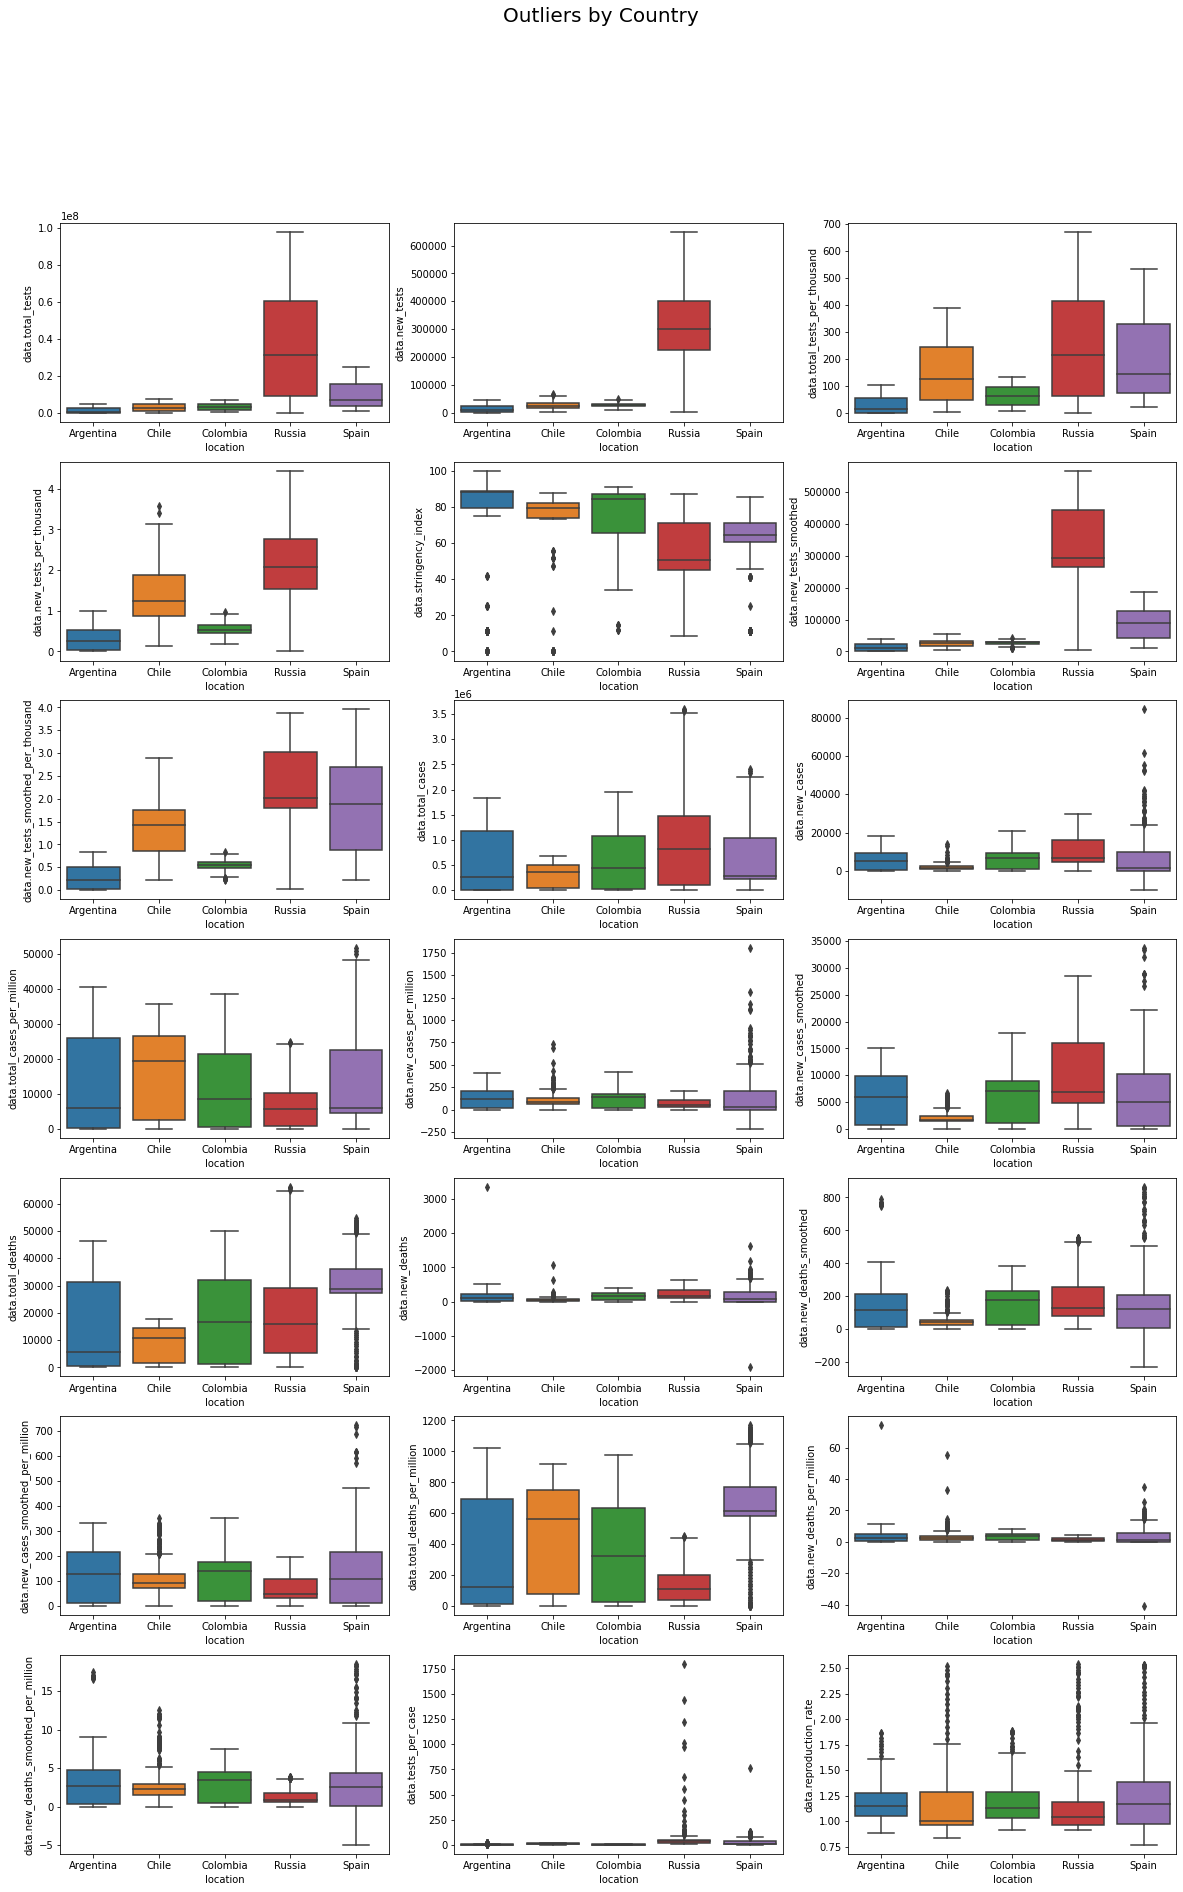

In [48]:
#veo los outliers de todas las columnas excepto 'location', 'population', 'life_expectancy', 'data.date','data.tests_units'
boxplots_per_country(covid,'')

In [49]:
#quito los outliers por cada pais y respectivamente columna 
datos_inciales=covid.shape
print("Muestra inicial del grupo de 5 paises:",covid.shape)
covid_spain=covid[covid['location']=='Spain']
print("Muestra inicial de España:",covid_spain.shape)
covid_argentina=covid[covid['location']=='Argentina']
print("Muestra inicial de Argentina:",covid_argentina.shape)
covid_russia=covid[covid['location']=='Russia']
print("Muestra inicial de Rusia:",covid_russia.shape)
covid_chile=covid[covid['location']=='Chile']
print("Muestra inicial de Chile:",covid_chile.shape)
covid_colombia=covid[covid['location']=='Colombia']
print("Muestra inicial de Colombia:",covid_chile.shape)

Muestra inicial del grupo de 5 paises: (1754, 27)
Muestra inicial de España: (356, 27)
Muestra inicial de Argentina: (387, 27)
Muestra inicial de Rusia: (356, 27)
Muestra inicial de Chile: (334, 27)
Muestra inicial de Colombia: (334, 27)


In [50]:
# quitamos los outliers para España
print("Muestra inicial del grupo de 5 paises:",covid.shape)
print("Muestra inicial de España:",covid_spain.shape)
covid_spain=remove_outlier(covid_spain, 'data.stringency_index')
covid_spain=remove_outlier(covid_spain, 'data.new_cases')
covid_spain=remove_outlier(covid_spain, 'data.new_cases_per_million')
covid_spain=remove_outlier(covid_spain, 'data.new_cases_smoothed')
covid_spain=remove_outlier(covid_spain, 'data.new_deaths')
covid_spain=remove_outlier(covid_spain, 'data.new_cases_smoothed_per_million')
covid_spain=remove_outlier(covid_spain, 'data.new_deaths_per_million')
covid_spain=remove_outlier(covid_spain, 'data.positive_rate')
covid_spain=remove_outlier(covid_spain, 'data.tests_per_case')
print("Datos sin outliers de España:",covid_spain.shape)

Muestra inicial del grupo de 5 paises: (1754, 27)
Muestra inicial de España: (356, 27)
Datos sin outliers de España: (196, 27)


In [51]:
# quitamos los outliers para Argentina
print("Muestra inicial del grupo de 5 paises:",covid.shape)
print("Muestra inicial de Argentina:",covid_argentina.shape)
covid_argentina=remove_outlier(covid_argentina,'data.stringency_index')
covid_argentina=remove_outlier(covid_argentina,'data.new_deaths')
covid_argentina=remove_outlier(covid_argentina,'data.new_deaths_smoothed')
covid_argentina=remove_outlier(covid_argentina,'data.new_deaths_per_million')
covid_argentina=remove_outlier(covid_argentina,'data.new_deaths_per_million')
covid_argentina=remove_outlier(covid_argentina,'data.new_deaths_smoothed_per_million')
covid_argentina=remove_outlier(covid_argentina, 'data.date')
print("Datos sin outliers Argentina:",covid_argentina.shape)

Muestra inicial del grupo de 5 paises: (1754, 27)
Muestra inicial de Argentina: (387, 27)
Datos sin outliers Argentina: (298, 27)


In [52]:
# quitamos los outliers para Rusia
print("Muestra inicial del grupo de 5 paises:",covid.shape)
print("Muestra inicial de Rusia:",covid_russia.shape)
covid_russia=remove_outlier(covid_russia,'data.tests_per_case')
print("Datos sin outliers Rusia:",covid_russia.shape)

Muestra inicial del grupo de 5 paises: (1754, 27)
Muestra inicial de Rusia: (356, 27)
Datos sin outliers Rusia: (288, 27)


In [53]:
# quitamos los outliers para Chile
print("Muestra inicial del grupo de 5 paises:",covid.shape)
print("Muestra inicial de Chile:",covid_chile.shape)
covid_chile=remove_outlier(covid_chile,'data.new_tests')
covid_chile=remove_outlier(covid_chile,'data.new_tests_per_thousand')
covid_chile=remove_outlier(covid_chile,'data.stringency_index')
covid_chile=remove_outlier(covid_chile,'data.new_cases')
covid_chile=remove_outlier(covid_chile,'data.new_cases_per_million')
covid_chile=remove_outlier(covid_chile,'data.new_deaths')
covid_chile=remove_outlier(covid_chile,'data.new_deaths_smoothed')
covid_chile=remove_outlier(covid_chile,'data.new_deaths_per_million')
covid_chile=remove_outlier(covid_chile,'data.new_deaths_smoothed_per_million')
covid_chile=remove_outlier(covid_chile,'data.positive_rate')
print("Datos sin outliers Chile:",covid_chile.shape)

Muestra inicial del grupo de 5 paises: (1754, 27)
Muestra inicial de Chile: (334, 27)
Datos sin outliers Chile: (145, 27)


In [54]:
# quitamos los outliers para Colombia
print("Muestra inicial del grupo de 5 paises:",covid.shape)
print("Muestra inicial de Colombia:",covid_colombia.shape)
covid_colombia=remove_outlier(covid_colombia,'data.new_tests')
covid_colombia=remove_outlier(covid_colombia,'data.stringency_index')
covid_colombia=remove_outlier(covid_colombia,'data.new_tests_per_thousand')
covid_colombia=remove_outlier(covid_colombia,'data.new_tests_smoothed')
covid_colombia=remove_outlier(covid_colombia,'data.new_tests_smoothed_per_thousand')
print("Datos sin outliers Colombia:",covid_colombia.shape)

Muestra inicial del grupo de 5 paises: (1754, 27)
Muestra inicial de Colombia: (321, 27)
Datos sin outliers Colombia: (208, 27)


In [55]:
#juntamos los datos limpios
covid=pd.concat([covid_spain,covid_argentina,covid_russia,covid_chile,covid_colombia])
print("Datos sin outliers del grupo de 5 paises",covid.shape)

Datos sin outliers del grupo de 5 paises (1135, 27)


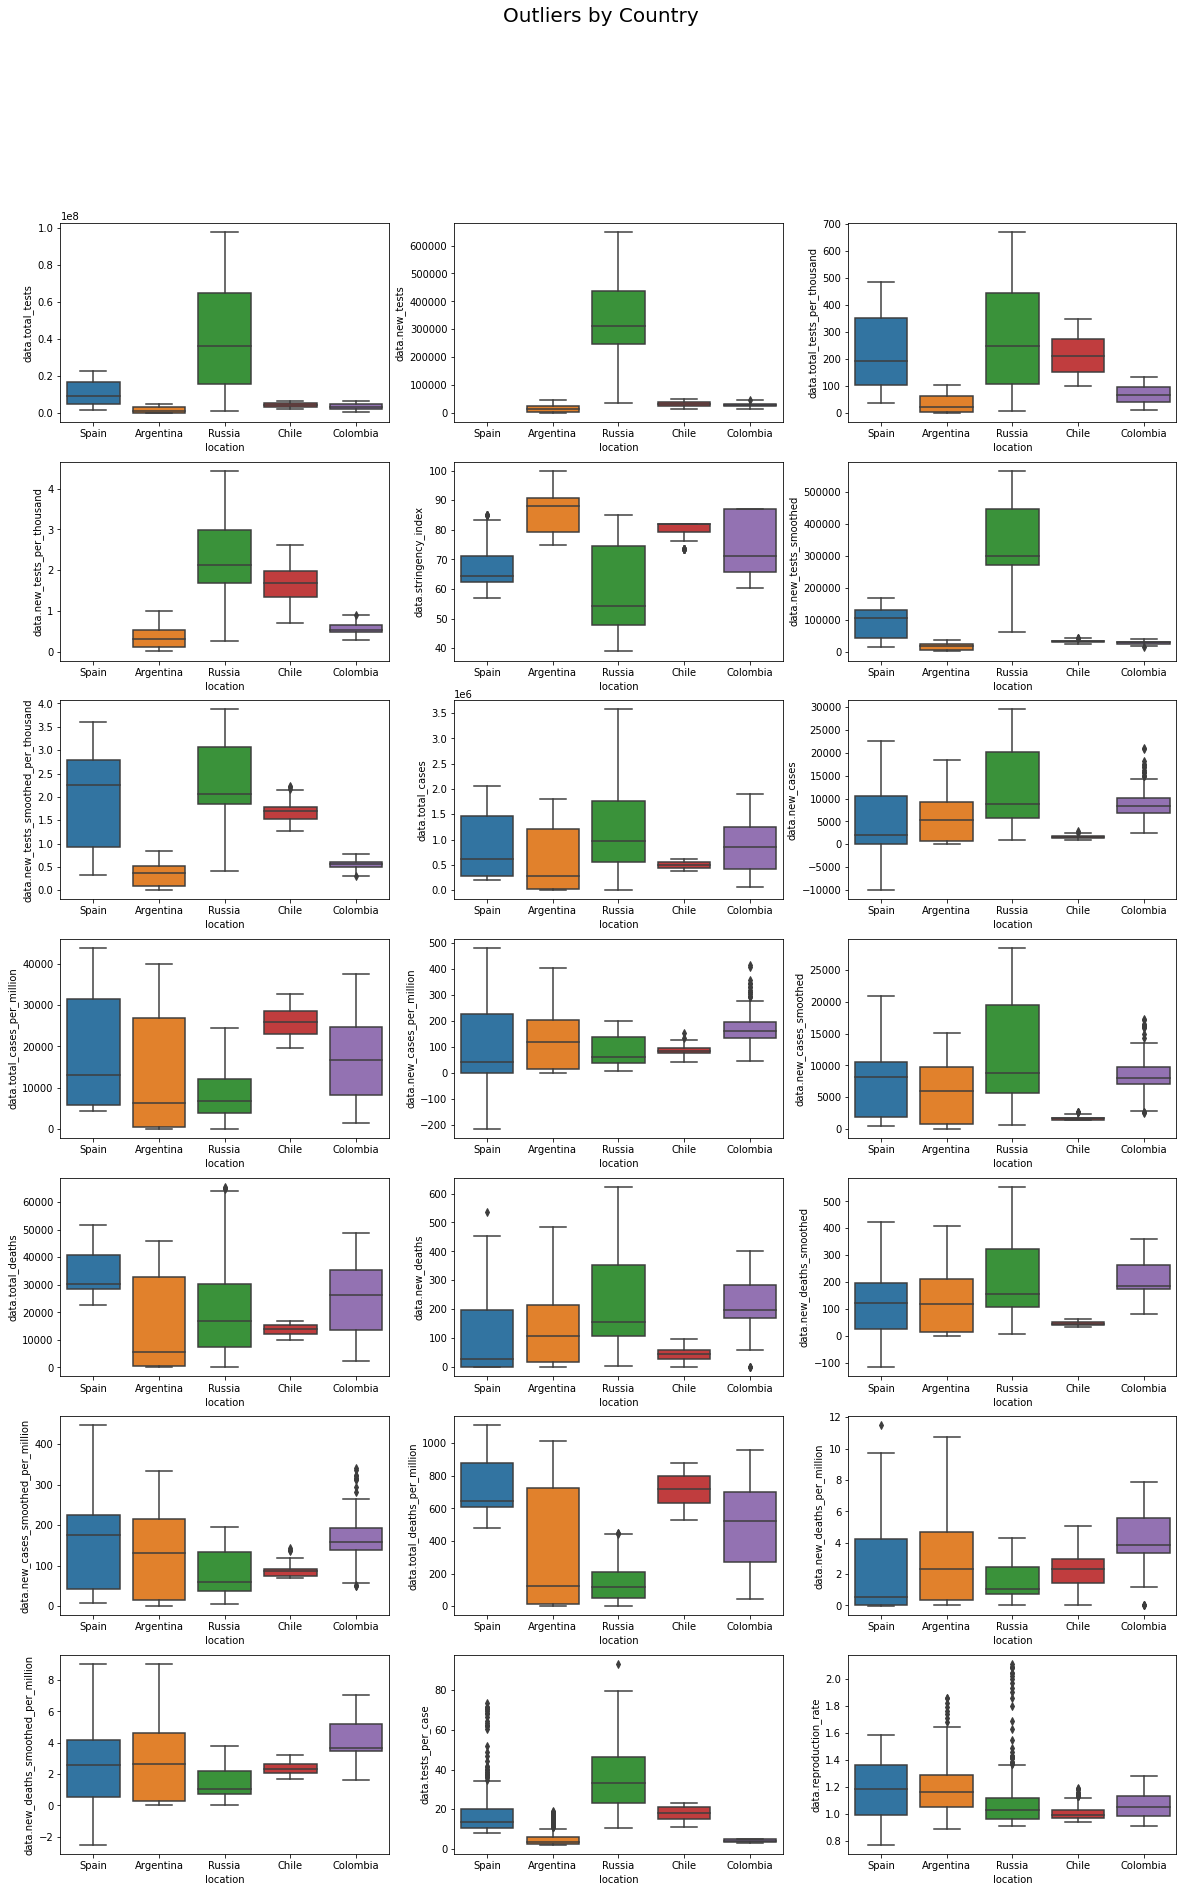

In [56]:
boxplots_per_country(covid,'CLEANED')

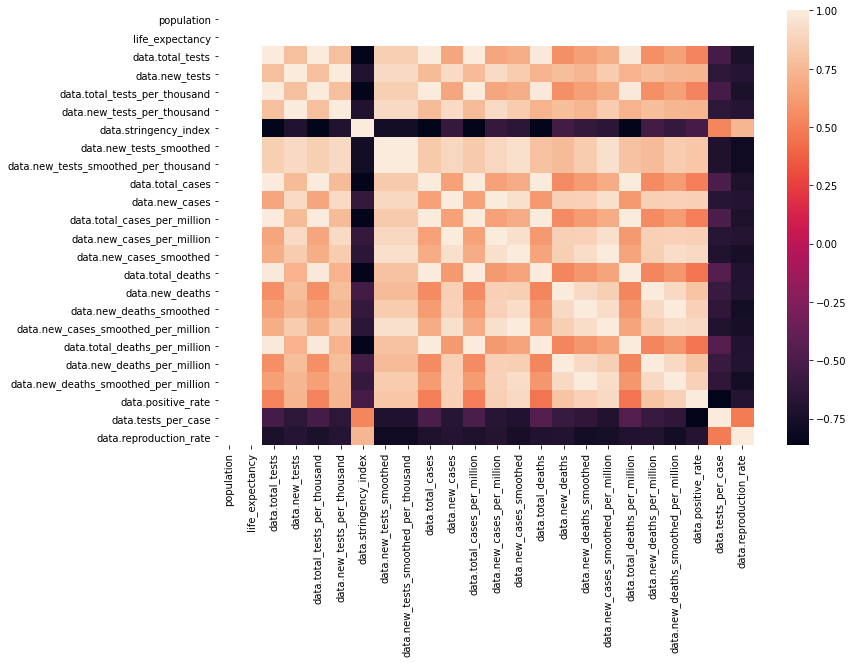

In [57]:
#matrix de correlación entre nuestras columnas, desglosadas por pais
heatmap_df(covid[covid['location']=='Argentina'], file_name='Heatmap_Argentina')

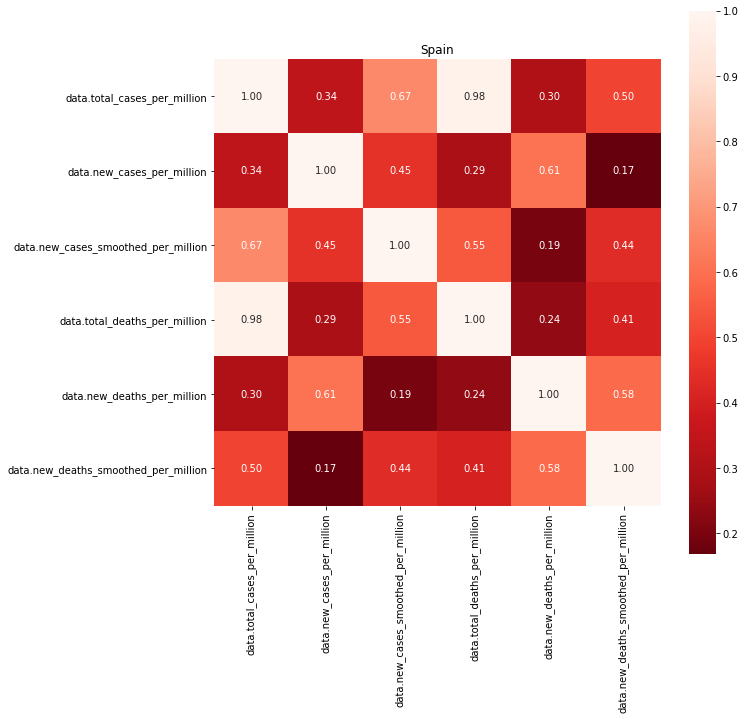

In [58]:
# mostrar la matriz de correlacion por cada pais: Argentina, Russia, Colombia, Chile and Spain
heatmap_with_column_filters(covid,'location','Spain', 
 'data.total_cases_per_million',
 'data.new_cases_per_million',
 'data.new_cases_smoothed_per_million',
 'data.total_deaths_per_million',
 'data.new_deaths_per_million',
 'data.new_deaths_smoothed_per_million',
)

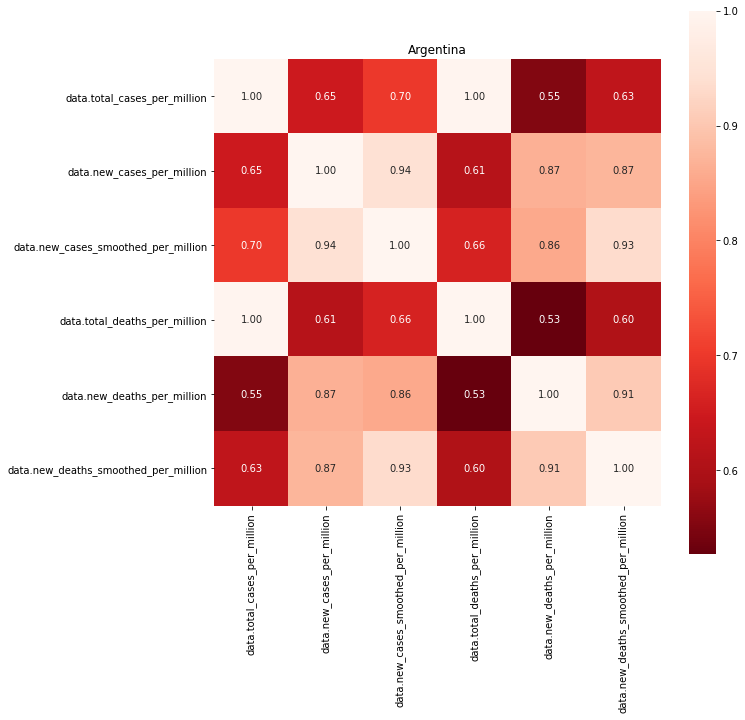

In [59]:
# mostrar la matriz de correlacion por cada pais: Argentina, Russia, Colombia, Chile and Spain
heatmap_with_column_filters(covid,'location','Argentina', 
'data.total_cases_per_million',
 'data.new_cases_per_million',
 'data.new_cases_smoothed_per_million',
 'data.total_deaths_per_million',
 'data.new_deaths_per_million',
 'data.new_deaths_smoothed_per_million',
)

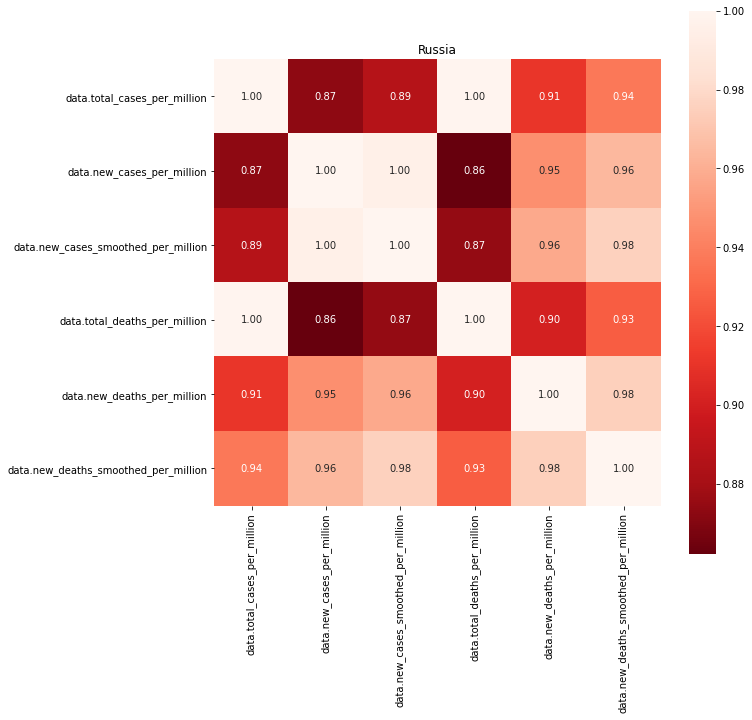

In [60]:
# mostrar la matriz de correlacion por cada pais:  Russia, Colombia, Chile and Spain
heatmap_with_column_filters(covid,'location','Russia',
 'data.total_cases_per_million',
 'data.new_cases_per_million',
 'data.new_cases_smoothed_per_million',
 'data.total_deaths_per_million',
 'data.new_deaths_per_million', 
 'data.new_deaths_smoothed_per_million'
)

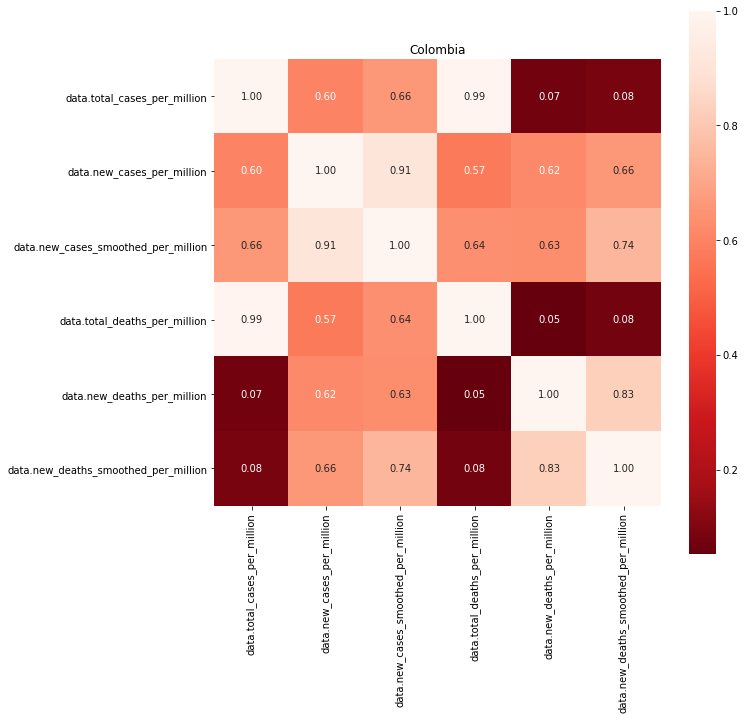

In [61]:
# mostrar la matriz de correlacion por cada pais:  Russia, Colombia, Chile and Spain
heatmap_with_column_filters(covid,'location','Colombia',
 'data.total_cases_per_million',
 'data.new_cases_per_million',
 'data.new_cases_smoothed_per_million',
 'data.total_deaths_per_million',
 'data.new_deaths_per_million', 
 'data.new_deaths_smoothed_per_million'
)

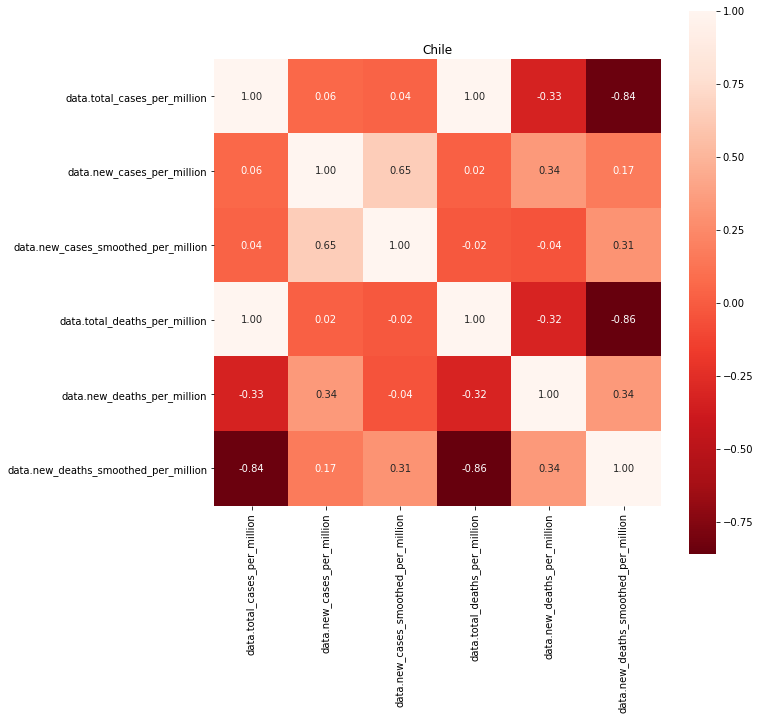

In [62]:
# mostrar la matriz de correlacion por cada pais: Argentina, Russia, Colombia, Chile and Spain

heatmap_with_column_filters(covid,'location','Chile', 
'data.total_cases_per_million',
 'data.new_cases_per_million',
 'data.new_cases_smoothed_per_million',
 'data.total_deaths_per_million',
 'data.new_deaths_per_million',
 'data.new_deaths_smoothed_per_million',

)

In [63]:
covid.isna().sum().sort_values(ascending=False)

data.new_tests_per_thousand             212
data.new_tests                          212
data.total_tests                        178
data.total_tests_per_thousand           178
data.reproduction_rate                   33
data.new_tests_smoothed_per_thousand      4
data.new_tests_smoothed                   4
data.tests_units                          4
data.positive_rate                        4
data.tests_per_case                       4
data.total_deaths                         0
data.new_deaths_smoothed_per_million      0
data.new_deaths_per_million               0
data.total_deaths_per_million             0
data.new_cases_smoothed_per_million       0
data.new_deaths_smoothed                  0
data.new_deaths                           0
location                                  0
data.new_cases_smoothed                   0
data.new_cases_per_million                0
data.total_cases_per_million              0
population                                0
data.total_cases                

In [64]:
covid.set_index('data.date', inplace=True)
covid

location  population  life_expectancy  data.total_tests  \
data.date                                                             
2020-04-24     Spain  46754783.0            83.56               NaN   
2020-04-25     Spain  46754783.0            83.56               NaN   
2020-04-26     Spain  46754783.0            83.56               NaN   
2020-04-27     Spain  46754783.0            83.56               NaN   
2020-04-28     Spain  46754783.0            83.56               NaN   
...              ...         ...              ...               ...   
2021-01-12  Colombia  50882884.0            77.29         6446939.0   
2021-01-13  Colombia  50882884.0            77.29         6484230.0   
2021-01-15  Colombia  50882884.0            77.29         6576146.0   
2021-01-16  Colombia  50882884.0            77.29         6615379.0   
2021-01-17  Colombia  50882884.0            77.29         6656335.0   

            data.new_tests  data.total_tests_per_thousand  \
data.date                                                   
2020-04-24             NaN                            NaN   
2020-04-25             NaN                            NaN   
2020-04-26             NaN                            NaN   
2020-04-27             NaN                            NaN   
2020-04-28             NaN                            NaN   
...                    ...                            ...   
2021-01-12         26789.0                        126.702   
2021-01-13         37291.0                        127.434   
2021-01-15         45862.0                        129.241   
2021-01-16         39233.0                        130.012   
2021-01-17         40956.0                        130.817   

            data.new_tests_per_thousand data.tests_units  \
data.date                                                  
2020-04-24                          NaN  tests performed   
2020-04-25                          NaN  tests performed   
2020-04-26                          NaN  tests performed   
2020-04-27                          NaN  tests performed   
2020-04-28                          NaN  tests performed   
...                                 ...              ...   
2021-01-12                        0.526  tests performed   
2021-01-13                        0.733  tests performed   
2021-01-15                        0.901  tests performed   
2021-01-16                        0.771  tests performed   
2021-01-17                        0.805  tests performed   

            data.stringency_index  data.new_tests_smoothed  ...  \
data.date                                                   ...   
2020-04-24                  85.19                  15466.0  ...   
2020-04-25                  85.19                  20403.0  ...   
2020-04-26                  85.19                  25340.0  ...   
2020-04-27                  85.19                  30276.0  ...   
2020-04-28                  85.19                  35213.0  ...   
...                           ...                      ...  ...   
2021-01-12                  81.02                  34954.0  ...   
2021-01-13                  81.02                  35484.0  ...   
2021-01-15                  81.02                  39051.0  ...   
2021-01-16                  81.02                  38657.0  ...   
2021-01-17                  81.02                  38491.0  ...   

            data.total_deaths  data.new_deaths  data.new_deaths_smoothed  \
data.date                                                                  
2020-04-24            22524.0            367.0                   360.286   
2020-04-25            22902.0            378.0                   408.429   
2020-04-26            23190.0            288.0                   391.000   
2020-04-27            23521.0            331.0                   381.286   
2020-04-28            23822.0            301.0                   362.857   
...                       ...              ...                       ...   
2021-01-12            46782.0    

location                  5
data.stringency_index    41
dtype: int64
------
Argentina    298
Russia       288
Colombia     208
Spain        196
Chile        145
Name: location, dtype: int64
------
------


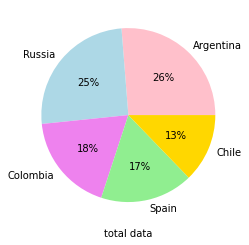

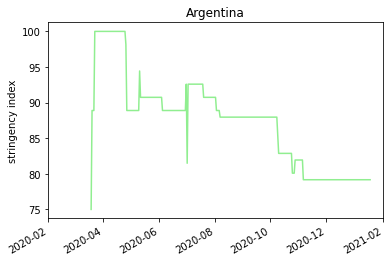

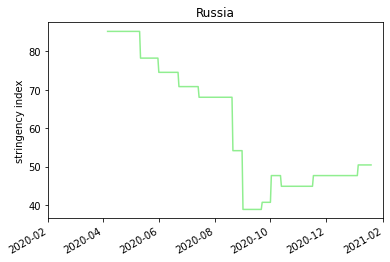

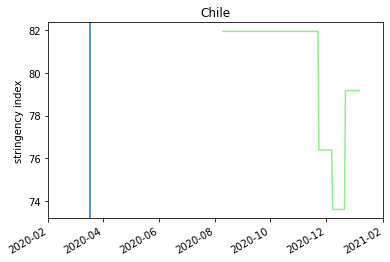

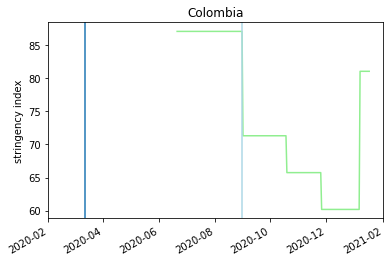

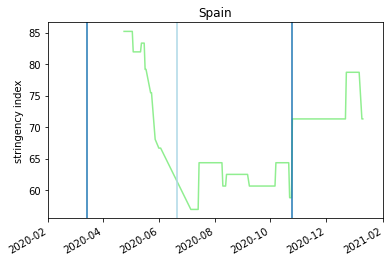

In [65]:
plot_clean_columns(df_name=covid, df_column='data.stringency_index', y_label='stringency index')

location                         5
data.new_cases_per_million    1050
dtype: int64
------
Argentina    293
Russia       288
Colombia     208
Chile        145
Spain        135
Name: location, dtype: int64
------
------


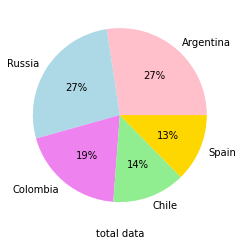

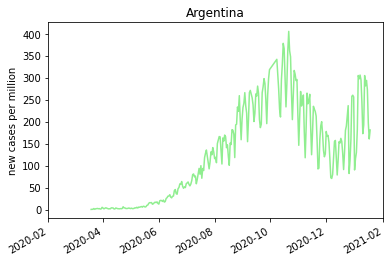

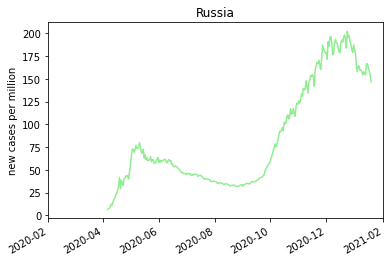

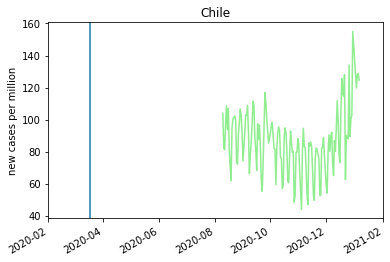

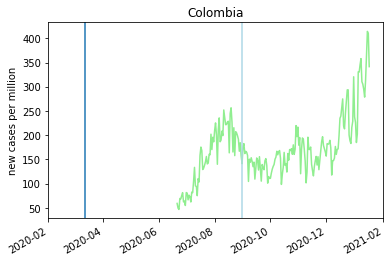

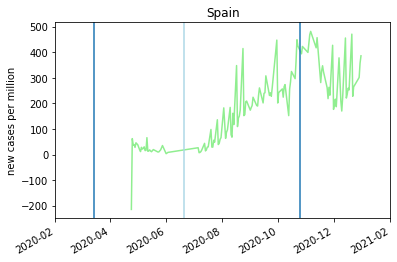

In [66]:
plot_clean_columns(df_name=covid, df_column='data.new_cases_per_million', y_label='new cases per million')

location                           5
data.total_cases_per_million    1074
dtype: int64
------
Argentina    298
Russia       288
Colombia     208
Spain        196
Chile        145
Name: location, dtype: int64
------
------


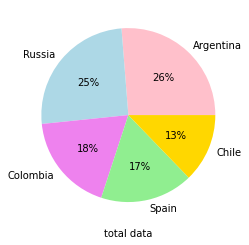

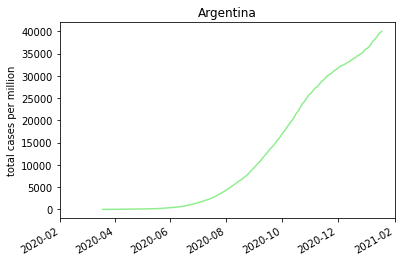

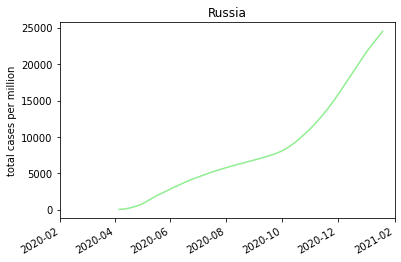

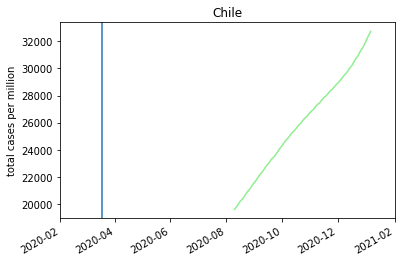

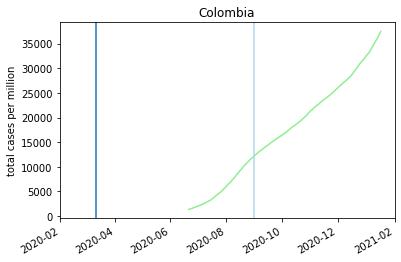

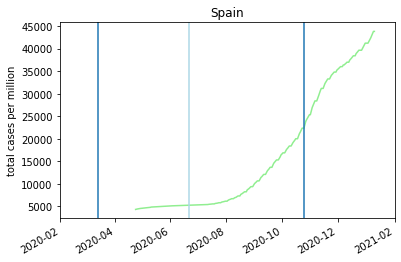

In [67]:
plot_clean_columns(df_name=covid, df_column='data.total_cases_per_million', y_label='total cases per million')

location                            5
data.total_deaths_per_million    1069
dtype: int64
------
Argentina    298
Russia       288
Colombia     208
Spain        196
Chile        145
Name: location, dtype: int64
------
------


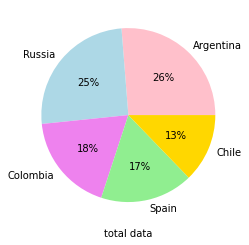

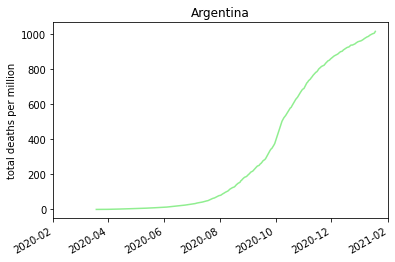

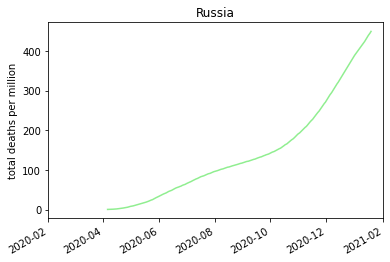

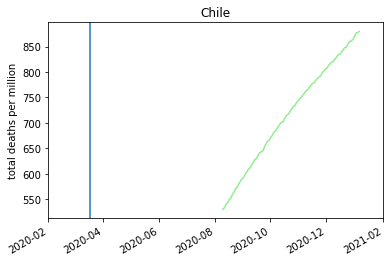

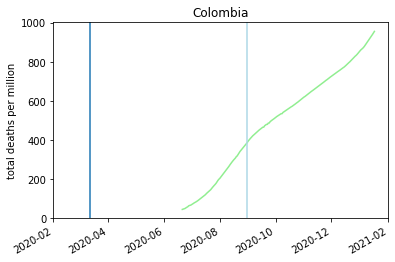

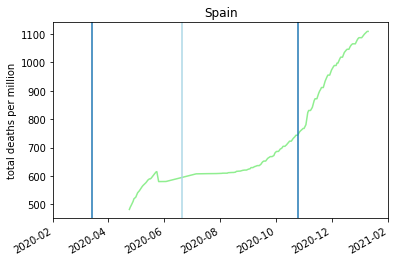

In [68]:
plot_clean_columns(df_name=covid, df_column='data.total_deaths_per_million', y_label='total deaths per million')

location                         5
data.new_deaths_per_million    660
dtype: int64
------
Argentina    294
Russia       288
Colombia     204
Chile        143
Spain        133
Name: location, dtype: int64
------
------


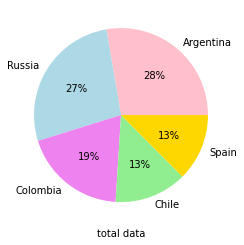

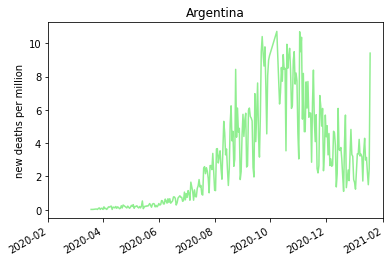

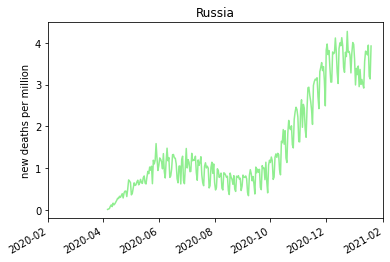

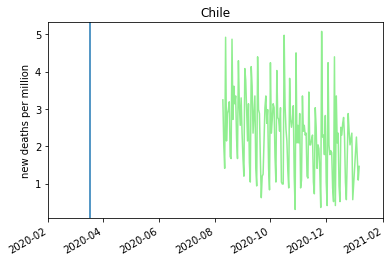

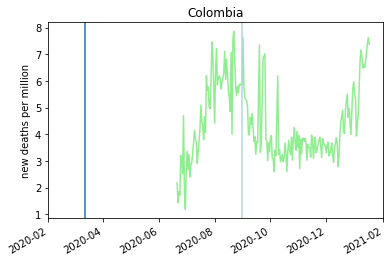

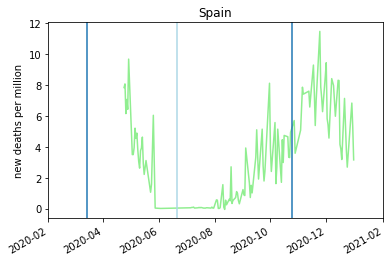

In [69]:
plot_clean_columns(df_name=covid, df_column='data.new_deaths_per_million', y_label='new deaths per million')

location                    5
data.reproduction_rate    101
dtype: int64
------
Argentina    286
Russia       277
Colombia     200
Spain        194
Chile        145
Name: location, dtype: int64
------
------


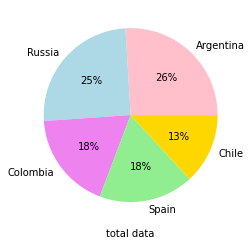

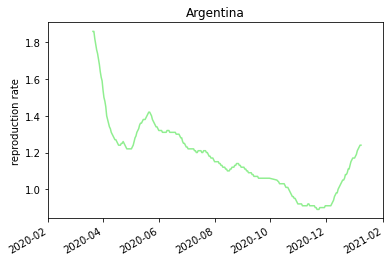

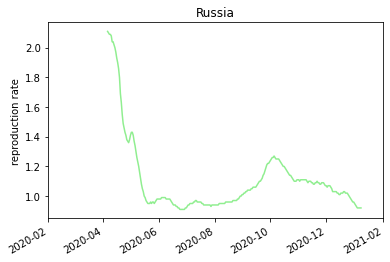

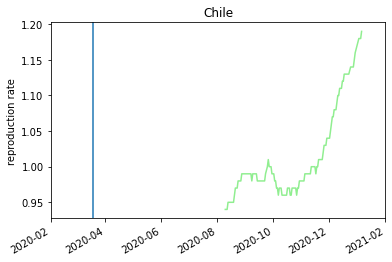

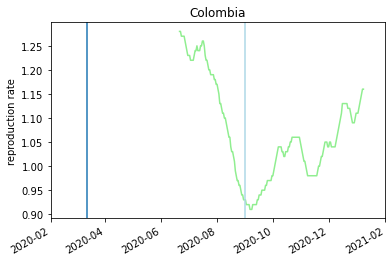

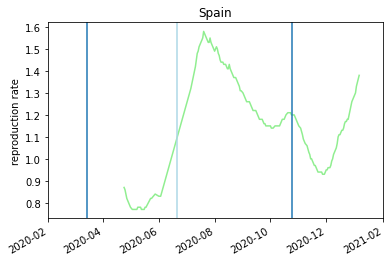

In [70]:
plot_clean_columns(df_name=covid, df_column='data.reproduction_rate', y_label='reproduction rate')

location                5
data.positive_rate    340
dtype: int64
------
Argentina    294
Russia       288
Colombia     208
Spain        196
Chile        145
Name: location, dtype: int64
------
------


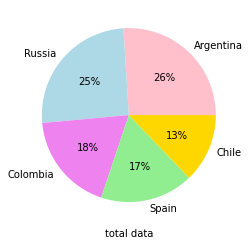

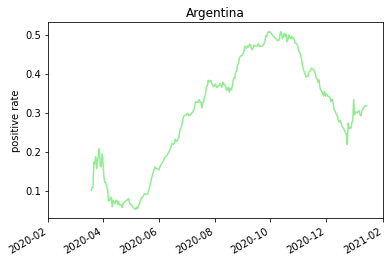

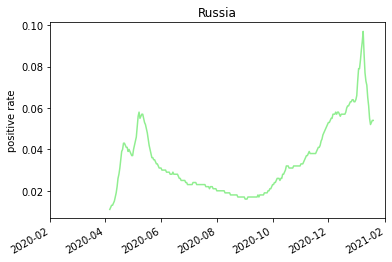

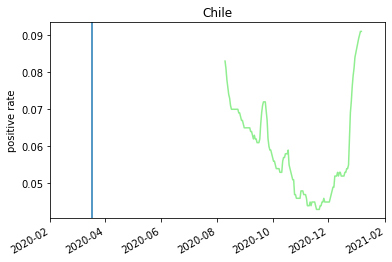

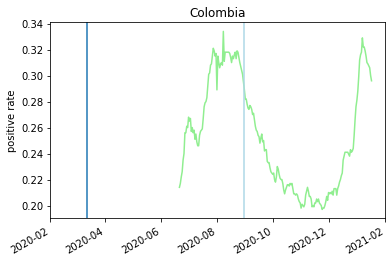

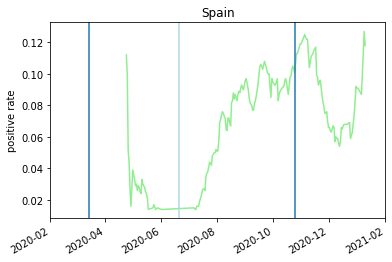

In [71]:
plot_clean_columns(df_name=covid, df_column='data.positive_rate', y_label='positive rate')

location                 5
data.tests_per_case    368
dtype: int64
------
Argentina    294
Russia       288
Colombia     208
Spain        196
Chile        145
Name: location, dtype: int64
------
------


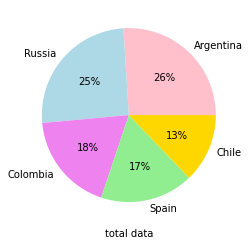

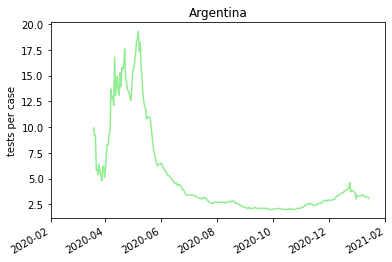

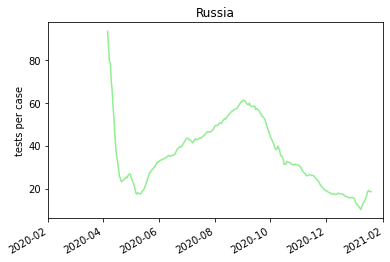

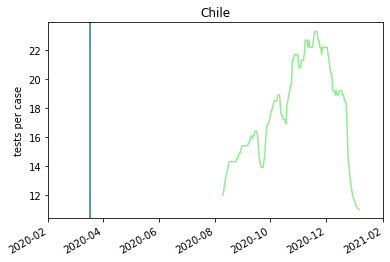

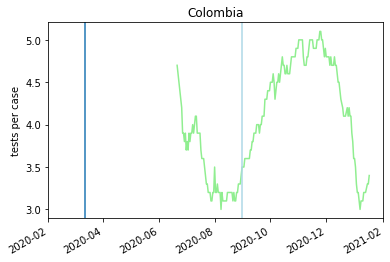

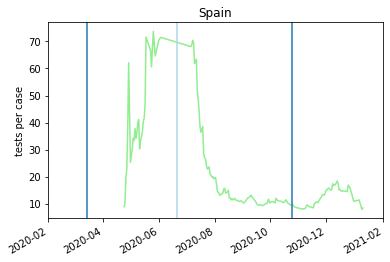

In [72]:
plot_clean_columns(df_name=covid, df_column='data.tests_per_case', y_label='tests per case')

location              5
data.total_tests    957
dtype: int64
------
Argentina    294
Russia       282
Colombia     208
Chile        145
Spain         28
Name: location, dtype: int64
------
------


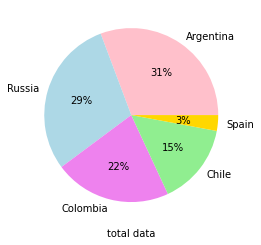

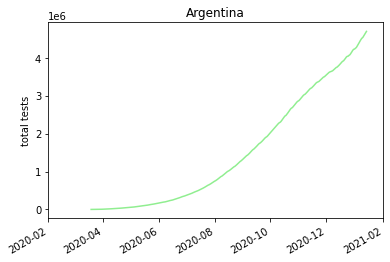

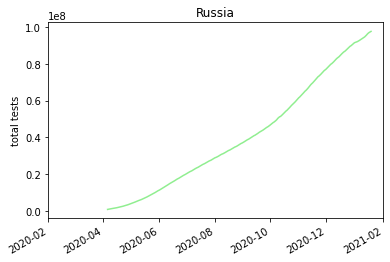

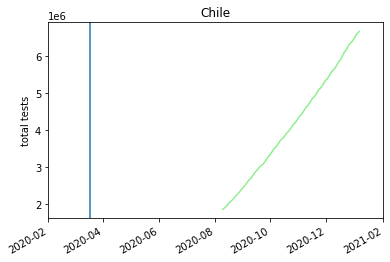

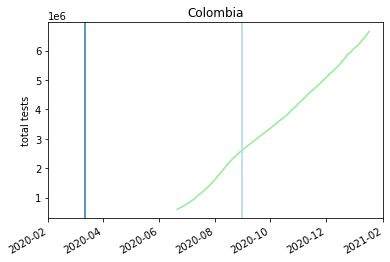

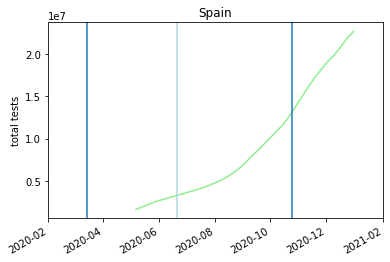

In [73]:
plot_clean_columns(df_name=covid, df_column='data.total_tests', y_label='total tests')

location            4
data.new_tests    922
dtype: int64
------
Argentina    294
Russia       276
Colombia     208
Chile        145
Name: location, dtype: int64
------
------


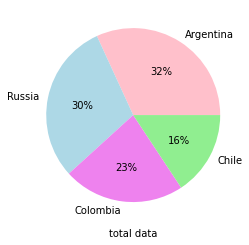

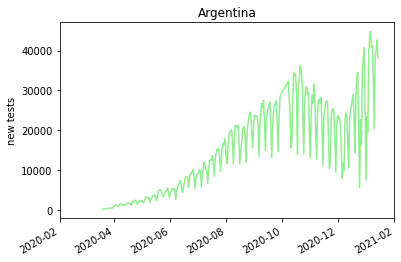

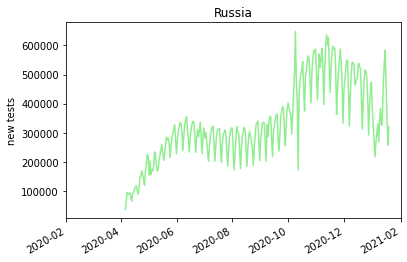

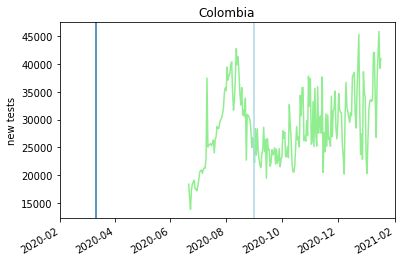

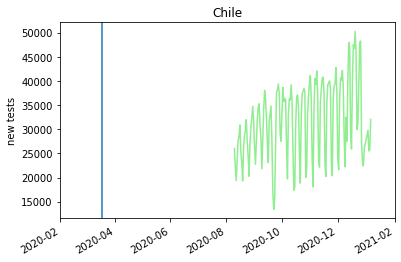

In [74]:
plot_clean_columns(df_name=covid, df_column='data.new_tests', y_label='new tests')

### Representamos la posicion que tienen nuestros paises respeto del total de paises en relacion al total de casos, todal de muertes y esperanza de vida

In [4]:
#Agrupamos las columnas que nos interesan
covid_position= group(dt=data_complete_clean(), col1="location", col2="data.total_cases_per_million",col3= "data.total_deaths_per_million", col4="life_expectancy")
covid_position

data.total_cases_per_million  data.total_deaths_per_million  \
location                                                                   
Afghanistan                    741.015604                      28.985840   
Albania                       5526.126834                     125.484681   
Algeria                        874.626184                      31.522275   
Andorra                      34348.999638                     732.476105   
Angola                         170.711688                       4.649268   
...                                   ...                            ...   
Vietnam                          7.070567                       0.331623   
World                         3345.288869                      92.637169   
Yemen                           49.830700                      15.292097   
Zambia                         537.080690                      11.646119   
Zimbabwe                       393.779386                      10.744266   

             life_expectancy  
location                      
Afghanistan            64.83  
Albania                78.57  
Algeria                76.88  
Andorra                83.73  
Angola                 61.15  
...                      ...  
Vietnam                75.40  
World                  72.58  
Yemen                  66.12  
Zambia                 63.89  
Zimbabwe               61.49  

[192 rows x 3 columns]

In [5]:
#Filtramos y ordenamos cada columna por orden para comprobar la posicion que ocupan nuestros paises
cases_col= sort_columns(dt=covid_position, col_name="data.total_cases_per_million")
deaths_col = sort_columns(dt=covid_position, col_name="data.total_deaths_per_million")
life_col = sort_columns(dt=covid_position, col_name="life_expectancy")

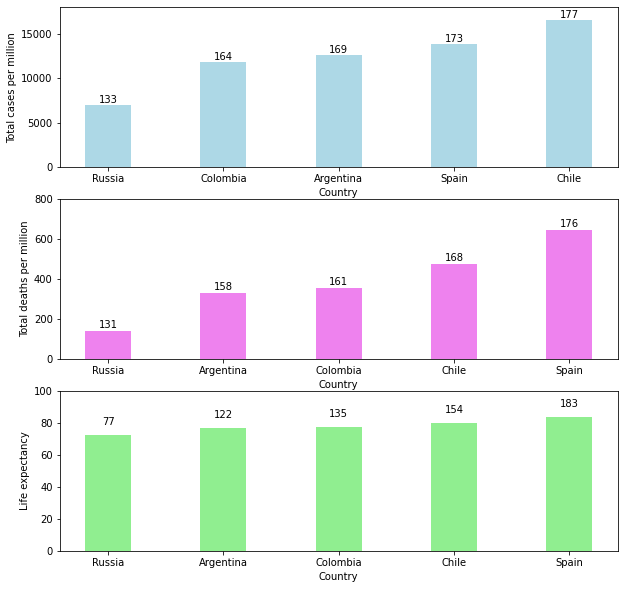

In [6]:
#Representamos nuestros paises, respecto al total 
position_countries(dt1=cases_col, dt2=deaths_col, dt3= life_col)